In [1]:
import pandas as pd
# 1. 导入数据源

data = pd.read_csv(r'./flow_data.csv',encoding='utf-8',header=None)
df_data = pd.DataFrame(data)
new_columns = ['user_id', 'payment', 'describe', 'unix_time']  # 加一下列名
df_data.columns = new_columns
df_data

,user_id,payment,describe,unix_time
0,2996945,-50000,"跨行转账,转跨行转账,转出账号:622150391000",1497522514
1,7577921,27600,"淘宝购物-充值:阿里云服务购买,业务交易号:D201411088070747",1510068976
2,22005785,3900,"支付-充值:阿里云服务购买,业务交易号:D201411068047655",1509866886
3,7577921,8800,"淘宝购物-充值:阿里云服务购买,业务交易号:D201410297959967",1509199032
4,7577921,27600,"淘宝购物-充值:阿里云服务购买,业务交易号:D201410297959483",1509194940
...,...,...,...,...
99995,13480101,-15193,用户13887857,0
99996,13480101,-1377,用户13887857,0
99997,13480101,-2321,用户13887857,0
99998,13480101,-1292,用户13887857,0


In [2]:
# 2. 分析源数据信息

df_data.info()
# describe列有缺少值，将其转化为str，用nan填充

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    100000 non-null  int64 
 1   payment    100000 non-null  int64 
 2   describe   99343 non-null   object
 3   unix_time  100000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 3.1+ MB


In [3]:
df_data['user_id'] = df_data['user_id'].astype(str)
df_data['payment'] = df_data['payment'].astype(str)
df_data['describe'] = df_data['describe'].astype(str)
df_data['unix_time'] = df_data['unix_time'].astype(str)
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    100000 non-null  object
 1   payment    100000 non-null  object
 2   describe   100000 non-null  object
 3   unix_time  100000 non-null  object
dtypes: object(4)
memory usage: 3.1+ MB


In [4]:
# 查看用户总数
user_num = len(df_data['user_id'].unique())
print(f'用户总数：{user_num}')
# 查看用户交易次数
user_counts = df_data['user_id'].value_counts()
print(f'每个用户交易次数：{user_counts}')

用户总数：1680
每个用户交易次数：user_id
22005785    2316
26556482    1872
13480101    1746
16368171    1614
33126125    1399
            ... 
5460665        1
7463643        1
6677435        1
2480518        1
4971952        1
Name: count, Length: 1680, dtype: int64


In [5]:
# 3. 数据清洗
# (1)时间异常值清洗(时间戳通常是以秒为单位的10位整数,因此找出不为十位数的时间值进行删除操作)
pattern = r'^\d{10}$'
outlier = df_data[~df_data['unix_time'].str.match(pattern)] # 取不符合的数据
outlier_counts = outlier['unix_time'].value_counts()
outlier_counts
# 有74个异常值

unix_time
0    74
Name: count, dtype: int64

In [6]:
# 删除异常值
df_data = df_data[df_data['unix_time']!='0']
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99926 entries, 0 to 99990
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    99926 non-null  object
 1   payment    99926 non-null  object
 2   describe   99926 non-null  object
 3   unix_time  99926 non-null  object
dtypes: object(4)
memory usage: 3.8+ MB


In [7]:
# (2)交易金额异常值清洗(csv文件中使用\\N来表示空值或缺失值)
num = len(df_data[df_data['payment']=='\\N'])
num  # 返回为0无异常值，无需处理

0

In [8]:
# (3)交易附言缺失值清洗
num = len(df_data[df_data['describe'].isnull()])
num  # 返回为0无缺失值，无需处理

0

In [9]:
# (4)时间戳转换（具体到年月日）
import pandas as pd
from datetime import datetime
df_data = df_data.copy()
df_data['unix_time'] = pd.to_numeric(df_data['unix_time'], errors='coerce')
df_data = df_data.dropna(subset=['unix_time']).copy()
valid_mask = (df_data['unix_time'] >= 0) & (df_data['unix_time'] <= 4102444800)
df_data = df_data[valid_mask].copy()
df_data['datetime'] = pd.to_datetime(df_data['unix_time'], unit='s')

In [10]:
# 细化时间到各个列
df_data['year'] = df_data['datetime'].map(lambda x:x.year)
df_data['month'] = df_data['datetime'].map(lambda x:x.month)
df_data['week'] = df_data['datetime'].map(datetime.isoweekday)
df_data['hour'] = df_data['datetime'].map(lambda x: x.hour)
df_data

,user_id,payment,describe,unix_time,datetime,year,month,week,hour
0,2996945,-50000,"跨行转账,转跨行转账,转出账号:622150391000",1497522514,2017-06-15 10:28:34,2017,6,4,10
1,7577921,27600,"淘宝购物-充值:阿里云服务购买,业务交易号:D201411088070747",1510068976,2017-11-07 15:36:16,2017,11,2,15
2,22005785,3900,"支付-充值:阿里云服务购买,业务交易号:D201411068047655",1509866886,2017-11-05 07:28:06,2017,11,7,7
3,7577921,8800,"淘宝购物-充值:阿里云服务购买,业务交易号:D201410297959967",1509199032,2017-10-28 13:57:12,2017,10,6,13
4,7577921,27600,"淘宝购物-充值:阿里云服务购买,业务交易号:D201410297959483",1509194940,2017-10-28 12:49:00,2017,10,6,12
...,...,...,...,...,...,...,...,...,...
99921,13623598,666600,800,1491494400,2017-04-06 16:00:00,2017,4,4,16
99922,13623598,116600,70,1494086400,2017-05-06 16:00:00,2017,5,6,16
99988,18201811,32780,支付宝-tmall:义乌市七多服饰有限公司,1510243200,2017-11-09 16:00:00,2017,11,4,16
99989,14559923,9294,支付宝-tmall:济南棉老大商贸有限公司,1510243200,2017-11-09 16:00:00,2017,11,4,16


In [11]:
# (4)交易金额处理（：分转元，四舍五入到两位小数
df_data['payment'] = pd.to_numeric(df_data['payment'], errors='coerce')
df_data['payment'] = (df_data['payment'] / 100).round(2)
df_data['payment'] = df_data['payment'].astype('float64')
df_data

,user_id,payment,describe,unix_time,datetime,year,month,week,hour
0,2996945,-500.00,"跨行转账,转跨行转账,转出账号:622150391000",1497522514,2017-06-15 10:28:34,2017,6,4,10
1,7577921,276.00,"淘宝购物-充值:阿里云服务购买,业务交易号:D201411088070747",1510068976,2017-11-07 15:36:16,2017,11,2,15
2,22005785,39.00,"支付-充值:阿里云服务购买,业务交易号:D201411068047655",1509866886,2017-11-05 07:28:06,2017,11,7,7
3,7577921,88.00,"淘宝购物-充值:阿里云服务购买,业务交易号:D201410297959967",1509199032,2017-10-28 13:57:12,2017,10,6,13
4,7577921,276.00,"淘宝购物-充值:阿里云服务购买,业务交易号:D201410297959483",1509194940,2017-10-28 12:49:00,2017,10,6,12
...,...,...,...,...,...,...,...,...,...
99921,13623598,6666.00,800,1491494400,2017-04-06 16:00:00,2017,4,4,16
99922,13623598,1166.00,70,1494086400,2017-05-06 16:00:00,2017,5,6,16
99988,18201811,327.80,支付宝-tmall:义乌市七多服饰有限公司,1510243200,2017-11-09 16:00:00,2017,11,4,16
99989,14559923,92.94,支付宝-tmall:济南棉老大商贸有限公司,1510243200,2017-11-09 16:00:00,2017,11,4,16


In [12]:
# (5)重复数据删除
duplicate_values = df_data[df_data.duplicated()]
df_data.drop_duplicates(inplace=True)
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97238 entries, 0 to 99990
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   user_id    97238 non-null  object        
 1   payment    97238 non-null  float64       
 2   describe   97238 non-null  object        
 3   unix_time  97238 non-null  int64         
 4   datetime   97238 non-null  datetime64[ns]
 5   year       97238 non-null  int64         
 6   month      97238 non-null  int64         
 7   week       97238 non-null  int64         
 8   hour       97238 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 7.4+ MB


In [37]:
df_data.to_csv(r'C:\Users\荣耀\Desktop\项目-电商平台大数据消费分析\resultt.txt')

In [18]:
# 4. 客户交易行为分析
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']='SimHei'
plt.rcParams['axes.unicode_minus'] = False  # 强制使用 ASCII 减号（非 Unicode 符号）

<Figure size 640x480 with 0 Axes>

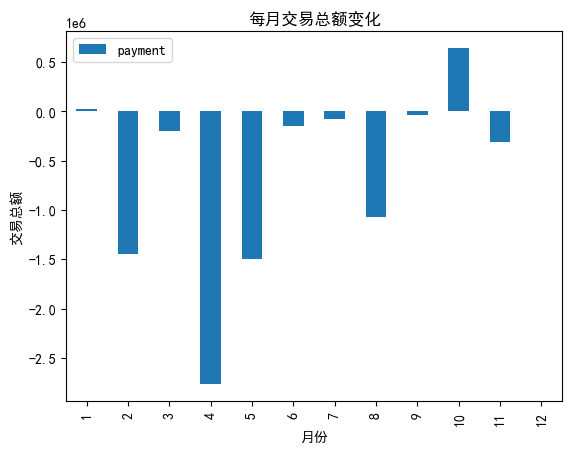

In [78]:
# (1)每月交易总额变化
fig = plt.figure()
df_data_year = df_data[df_data['year']==2017]
df_data_year.groupby('month')[['payment']].sum().plot(kind='bar')
plt.xlabel('月份')
plt.ylabel('交易总额')
plt.title('每月交易总额变化')
plt.show()

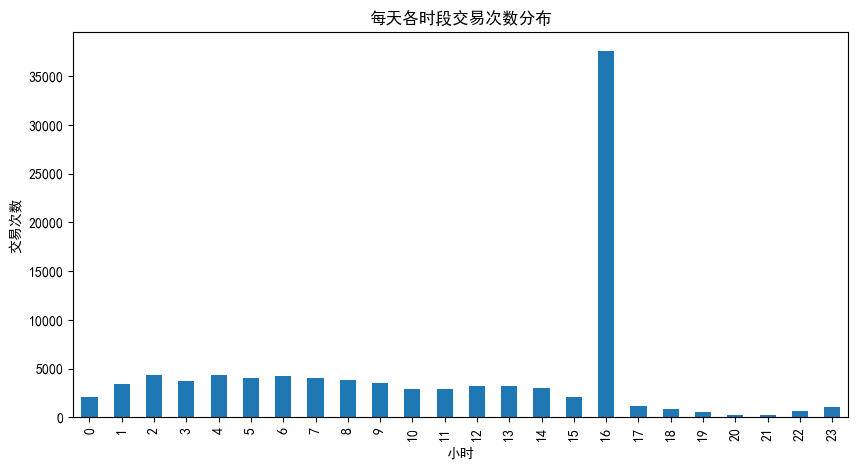

In [77]:
# (2)每天各时段交易次数分布
fig = plt.figure(figsize=(10,5))
df_data['datetime'].dt.hour.value_counts().sort_index().plot(kind='bar')
plt.xlabel('小时')
plt.ylabel('交易次数')
plt.title('每天各时段交易次数分布')
plt.show()

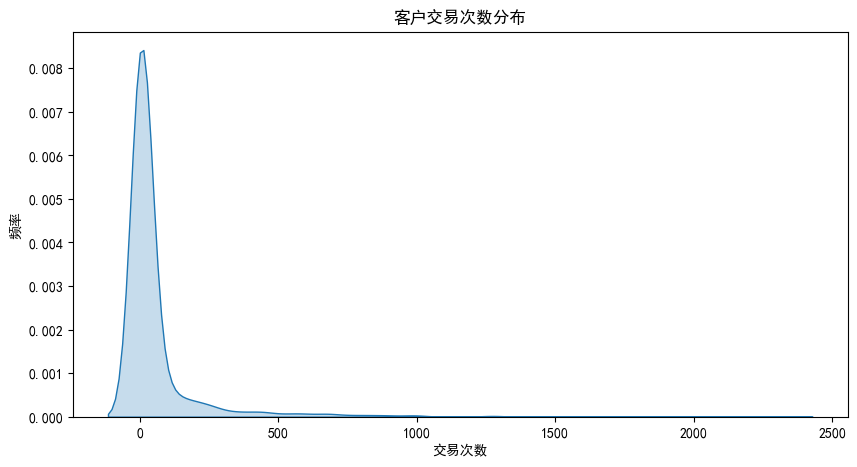

In [76]:
# (3)客户交易次数分布
import seaborn as sns
fig=plt.figure(figsize=(10,5))
sns.kdeplot(df_data.user_id.value_counts(),fill=True,legend=False)
plt.xlabel('交易次数')
plt.ylabel('频率')
plt.title('客户交易次数分布')
plt.show()

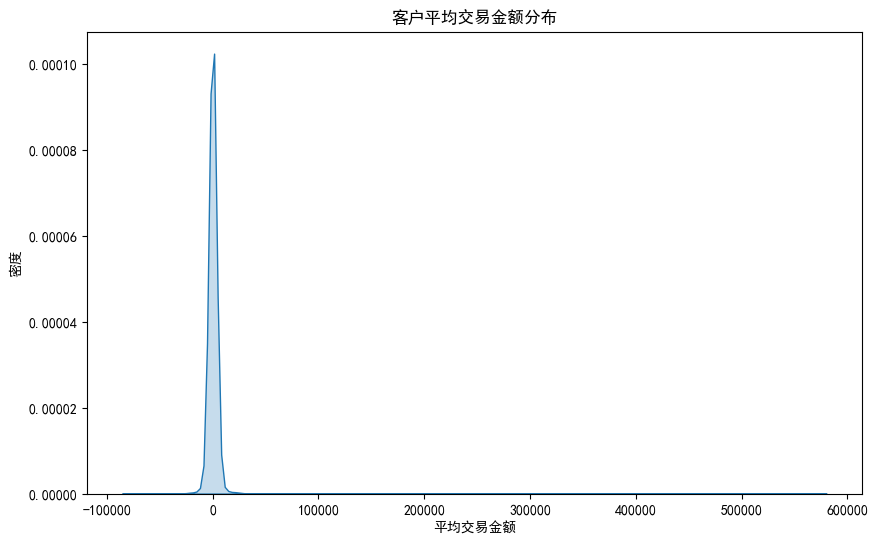

In [75]:
# (4)客户平均交易金额
user_avg_payment = df_data.groupby('user_id')['payment'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.kdeplot(data=user_avg_payment['payment'], fill=True)
plt.xlabel('平均交易金额')
plt.ylabel('密度')
plt.title('客户平均交易金额分布')
plt.show()

In [103]:
# (5)客户交易总收入、总支出、交易次数
user_summary = df_data.groupby('user_id').agg(
    总支出=('payment', lambda x: x[x > 0].sum()),  # 正数为支出
    总收入=('payment', lambda x: x[x < 0].abs().sum()),  # 负数为收入
    交易次数=('payment', 'count')
).reset_index()
# 处理 NaN（无收入/支出的用户填充0）
user_summary = user_summary.fillna(0)
user_summary

,user_id,总支出,总收入,交易次数
0,10014615,62727.45,66461.81,492
1,10023001,11.00,0.00,1
2,10033233,440.67,2000.00,2
3,10042085,10091.50,0.00,2
4,10058995,554.96,572.56,8
...,...,...,...,...
1675,9925277,0.00,5304.64,1
1676,9955238,9500.00,0.00,1
1677,9978041,1000.00,0.00,1
1678,9996519,1003.00,0.00,2


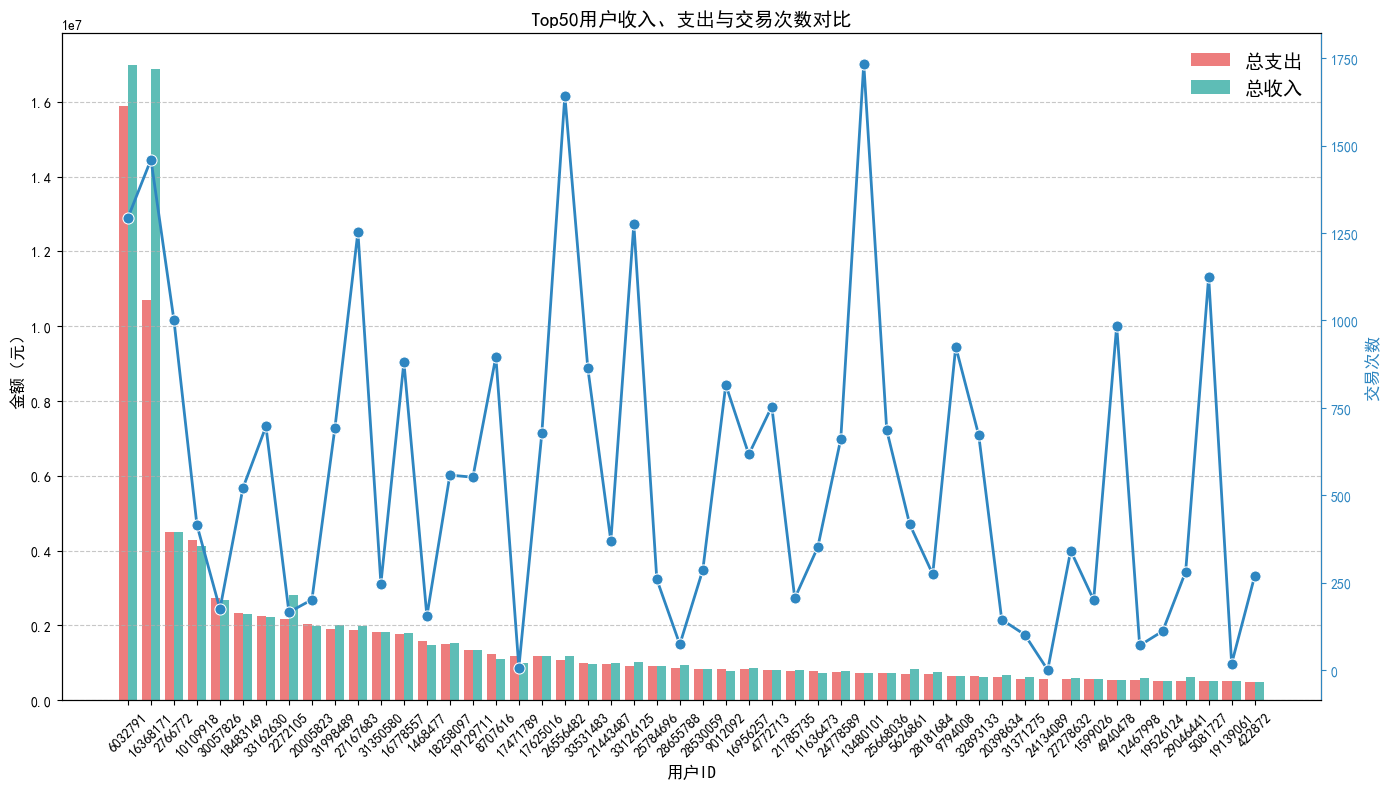

In [129]:
# 前50名用户总收入、总支出、交易次数对比
top_users = user_summary.sort_values('总支出', ascending=False).head(50)

fig, ax1 = plt.subplots(figsize=(14, 8))
sns.barplot(
    data=top_users.melt(id_vars='user_id', value_vars=['总支出', '总收入']),
    x='user_id',
    y='value',
    hue='variable',
    palette=['#FF6B6B', '#4ECDC4'],
    ax=ax1
)
ax1.set_title('Top50用户收入、支出与交易次数对比', fontsize=14)
ax1.set_xlabel('用户ID', fontsize=12)
ax1.set_ylabel('金额（元）', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

ax2 = ax1.twinx()
sns.lineplot(
    data=top_users,
    x='user_id',
    y='交易次数',
    color='#2E86C1',
    marker='o',
    linewidth=2,
    markersize=8,
    ax=ax2
)
ax2.set_ylabel('交易次数', fontsize=12)
ax2.spines['right'].set_color('#2E86C1')
ax2.yaxis.label.set_color('#2E86C1')
ax2.tick_params(axis='y', colors='#2E86C1')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(
    lines + lines2,
    labels + ['交易次数'],
    loc='upper right',
    frameon=False,
    fontsize=14
)

plt.tight_layout()
plt.show()

In [ ]:
# 交易频率与金额分析： 
# 大部分用户交易次数高但金额低，该类用户可能频繁进行小额消费（如日常购物）；少数用户交易次数低但金额高，该类用户倾向于大额单次交易（如奢侈品购买或企业采购）。
# 面向具体平台：少量用户如6032791，16368171用户的交易次数和总支出均高，属于高活跃度高价值用户，需重点维护；
# 大部分交易次数高但支出低，可能是价格敏感型用户，可通过促销提升客单价。

In [ ]:
# (6)交易附言生成词云图

In [138]:
import jieba
# 分割数据
df_data = df_data.sample(2000,random_state=10)
# df_data['describe_cutted'] = df_data['describe'].apply(lambda x:''.join( jieba.cut(x)))
stopwords=['以','让','不仅','用','而且']
def del_stopwords(words):
    output=''
    for word in words:
        if word not in stopwords:
            output+=word
    return output
df_data['describe_cutted'] = df_data['describe_cutted'].apply(del_stopwords)
df_data.head(10)

,user_id,payment,describe,unix_time,datetime,year,month,week,hour,交易类型,金额绝对值,describe_cutted
79604,17060554,-108.00,充值,1490013737,2017-03-20 12:42:17,2017,3,1,12,收入,108.00,充值
96164,28246979,98.86,淘宝购物-V领蕾丝兰精莫代尔内衣套装女士莫代尔秋衣秋裤套装美体保暖内衣积...,1483178687,2016-12-31 10:04:47,2016,12,6,10,支出,98.86,淘宝购物-V领蕾丝兰精莫代尔内衣套装女士莫代尔秋衣秋裤套装美体保暖内衣积...
39388,24413254,79.79,支付宝-taobao:吴秀珠,1503331200,2017-08-21 16:00:00,2017,8,1,16,支出,79.79,支付宝-taobao:吴秀珠
32856,12386783,20000.00,提现施海燕,1505355322,2017-09-14 02:15:22,2017,9,4,2,支出,20000.00,提现施海燕
611,23525956,0.87,您于2014-11-2021:10:32删除了此笔交易,1511044106,2017-11-18 22:28:26,2017,11,6,22,支出,0.87,您于2014-11-2021:10:32删除了此笔交易
58497,29038923,2580.60,上海老凤祥银楼有限公司徐家汇分号,1497369600,2017-06-13 16:00:00,2017,6,2,16,支出,2580.60,上海老凤祥银楼有限公司徐家汇分号
21508,2773805,-20.00,充值,1508402401,2017-10-19 08:40:01,2017,10,4,8,收入,20.00,充值
23669,5081727,139.60,淘宝购物-童装男童绅士套装秋季新款韩版英伦儿童领结全棉衬衫背带裤两件套,1507857051,2017-10-13 01:10:51,2017,10,5,1,支出,139.60,淘宝购物-童装男童绅士套装秋季新款韩版英伦儿童领结全棉衬衫背带裤两件套
59919,12103769,49.84,淘宝购物-159-2313-9237官方超快充—重庆移动50...,1496914502,2017-06-08 09:35:02,2017,6,4,9,支出,49.84,淘宝购物-159-2313-9237官方超快充—重庆移动50...
13596,31550340,74.00,上海消费支付宝：,1509984000,2017-11-06 16:00:00,2017,11,1,16,支出,74.00,上海消费支付宝：


In [144]:
import pyecharts.options as opts
from pyecharts.charts import WordCloud

def get_count(words):
    set1 = set(words)  # 转成集合去重
    d = dict((i, 0) for i in set1)
    for w in words:
        if w in set1:
            d[w] = d.get(w) + 1
    return d

# 假设 df_data['describe_cutted'] 是分词后的列表（例如 ["支付", "转账", "购物"]）
d = get_count(df_data['describe_cutted'])
lst = [(item, d.get(item)) for item in d]

(
    WordCloud()
    .add(
        series_name="交易附言词云图",
        data_pair=lst,
        word_size_range=[6, 66]
    )
    .set_global_opts(  
        title_opts=opts.TitleOpts(
            title="交易附言词云图",
            title_textstyle_opts=opts.TextStyleOpts(font_size=23)  # 参数名是 title_textstyle_opts
        ),
        tooltip_opts=opts.TooltipOpts(is_show=True)  # 类名是 TooltipOpts（带s）
    )
    .render('./bwordcloud.html')
)

'D:\\ANACONDA\\Scripts\\项目-电商平台大数据消费分析\\bwordcloud.html'